In [1]:
#adding pydecomp 
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/core/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/utils/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")

In [5]:
from pydecomp.core.TSVD import TSVD
import numpy as np

In [6]:
    #test procedure for the standard numpy matrix SVD
    from time import time
    print("\n Testing SVD with random matrix\n")
    n,m=10000,500
    F=np.random.rand(n,m)
    # F=np.reshape(np.arange(n*m),(n,m))

    t=time()
    phi, sigma, A=TSVD(F,solver='EVD',rank=5)
    print('\n --------------SVD by EVD computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))    
    
    t=time()
    phi, sigma, A=TSVD(F,solver='PRIMME',rank=5,epsilon=1e-6)
    print('\n --------------PRIMME_SVDs computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))


 Testing SVD with random matrix


 --------------SVD by EVD computing time {} 0.06543660163879395
r=5
sigma[:5]= [[1118.8410914 ]
 [  35.17541418]
 [  35.17071209]
 [  35.06422143]
 [  34.99602472]]

 Should be small : 640.8403067184277
Selected PRIMME_SVDS solver. This solver is iterative and best               suited for sparse tall skinny matrices. High accuracy requirement               may lead to intractable CPU times.

 --------------PRIMME_SVDs computing time {} 0.8423922061920166
r=5
sigma[:5]= [[1118.8410914 ]
 [  35.17541411]
 [  35.17071208]
 [  35.0642213 ]
 [  34.9960245 ]]

 Should be small : 640.8403067422745


In [7]:
import scipy
import primme
# Sparse random rectangular matrix 10^5x100
#A = scipy.sparse.rand(100000, 100, density=1., random_state=10)
#print(A.size)
# Compute the three closest singular values to 6.0 with a tolerance of 1e-6
svecs_left, svals, svecs_right, stats = primme.svds(F, 5, which='LM',
                                                    return_stats=True)
A_svals = svals
print(svals)
print(stats["elapsedTime"], stats["numMatvecs"])

[1118.8410914    35.17541418   35.17071209   35.06422143   34.99602472]
1.6952910423278809 557


In [8]:
(sigma[:,0]-svals)/sigma[:,0]

array([ 8.12889970e-16, -1.75850560e-09, -4.22915484e-10, -3.78410090e-09,
       -6.47468072e-09])

In [9]:
np.set_printoptions(precision=3)
print("phi orthog test")
print(phi.T@phi)
print("svecs orthog test")
print(svecs_left.T@svecs_left)

print("v orthog test")
print(A.T@A)
print("svecs orthog test")
print(svecs_right@svecs_right.T)

phi orthog test
[[ 1.000e+00  5.812e-15  1.739e-15  2.187e-15 -4.481e-15]
 [ 5.812e-15  1.000e+00 -1.442e-14 -7.711e-14 -8.813e-14]
 [ 1.739e-15 -1.442e-14  1.000e+00  9.457e-14 -4.911e-14]
 [ 2.187e-15 -7.711e-14  9.457e-14  1.000e+00  1.834e-14]
 [-4.481e-15 -8.813e-14 -4.911e-14  1.834e-14  1.000e+00]]
svecs orthog test
[[ 1.000e+00 -1.553e-14 -2.447e-15  8.853e-15  1.870e-15]
 [-1.553e-14  1.000e+00 -4.468e-13  2.410e-13  5.088e-14]
 [-2.447e-15 -4.468e-13  1.000e+00 -3.055e-13 -4.130e-14]
 [ 8.853e-15  2.410e-13 -3.055e-13  1.000e+00 -1.053e-13]
 [ 1.870e-15  5.088e-14 -4.130e-14 -1.053e-13  1.000e+00]]
v orthog test
[[ 1.000e+00  2.671e-16  1.733e-16  5.464e-17  1.561e-16]
 [ 2.671e-16  1.000e+00  1.058e-15  6.384e-16  1.377e-15]
 [ 1.733e-16  1.058e-15  1.000e+00 -1.596e-16 -1.839e-16]
 [ 5.464e-17  6.384e-16 -1.596e-16  1.000e+00 -8.847e-17]
 [ 1.561e-16  1.377e-15 -1.839e-16 -8.847e-17  1.000e+00]]
svecs orthog test
[[ 1.000e+00  1.769e-16 -5.352e-16  3.999e-16 -3.886e-16]
 [ 

In [10]:
import math
import numpy as np
q=2
shape=[65,64]
size=np.product(shape)
D=int(round(math.log( size, q )))
new_shape=[q] * D
tuple( [ q**(int(math.log(s-0.5,q))+1) for s in shape ] )

(128, 64)

In [11]:
print(new_shape)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [12]:
A=np.ones(new_shape)

In [13]:
B=np.ones(shape)

In [14]:
A.size==B.size

False

In [15]:
(math.log( size, q )).is_integer()

False

In [44]:
from pydecomp.core import QuanticsTT

reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1]
[1 2 4 5 5 5 5 5 5 5 5 5 5 5 5 5 4 2 1]
[1 2 4 6 6 6 6 6 6 6 6 6 6 6 6 6 4 2 1]
[1 2 4 7 7 7 7 7 7 7 7 7 7 7 7 7 4 2 1]
[1 2 4 8 8 8 8 8 8 8 8 8 8 8 8 8 4 2 1]
[1 2 4 8 9 9 9 9 9 9 9 9 9 9 9 8 4 2 1]
[ 1  2  4  8 10 10 10 10 10 10 10 10 10 10 10  8  4  2  1]
[ 1  2  4  8 15 15 15 15 15 15 15 15 15 15 15  8  4  2  1]
[ 1  2  4  8 16 20 20 20 20 20 20 20 20 20 16  8  4  2  1]
[ 1  2  4  8 16 25 25 25 25 25 25 25 25 25 16  8  4  2  1]
[ 1  2  4  8 16 30 30 30 30 30 30 30 30 30 16  8  4  2  1]
[ 1  2  4  8 16 32 35 35 35 35 35 35 35 32 16  8  4  2  1]
[ 1  2  4  8 16 32 40 40 40 40 40 40 40 32 16  8  4  2  1]
[ 1  2  4  8 16 32 50 50 50 50 50 50 50 32 16  8  4  2  1]
[ 1  2  4  8 16 32 60 60 60 60 60 60 60 32 16  8  4  2  1]
[ 1  2  4  8 16 32 64 70 70 70 70 70 64 3

/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:229: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:229: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_l

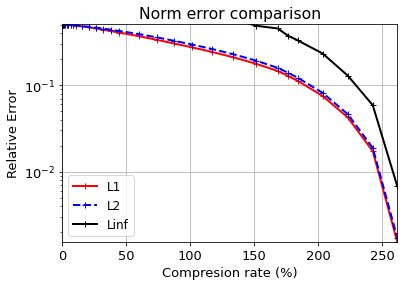

In [48]:
QuanticsTT.run_test()

In [42]:
qA = QuanticsTT.QuanticsTensor(np.ones((64,64)))

In [19]:
type(qA)==QuanticsTT.QuanticsTensor

True

## Benchmarking QTT
Comparing QTT against standard 2D decomposition methods for separable functions produces intersting results. The approximation accuracy is slightly lower for fixed range because of what I would call edge effect. On the other hand for space size larger than $2^{10}$, the decomposition becomes faster, by orders of magnitude and the compression rate extremely small (as shown below). Typicall compression values are in $O(10^{-5})$ for $\varepsilon = 10^{-3}$.

2048
reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1]
[1 2 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 2 1]
[1 2 4 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 4 4 2 1]
[1 2 4 7 7 7 7 7 7 7 7 7 7 7 6 5 5 5 4 4 2 1]
[1 2 4 8 8 8 8 8 8 8 8 7 7 7 6 5 5 5 4 4 2 1]
QTT_SVD decompostion time: 0.47 s
({'L1': [0.04221833254670512, 0.005260884112350912, 0.00017661599513721368, 1.6134099923476037e-05, 8.745115584244834e-07, 8.877695905757059e-08, 1.120980496261606e-08, 1.8907142023306017e-09], 'L2': [0.05197696505775145, 0.0064190175714365595, 0.00022558357998523474, 2.13330671250011e-05, 1.1216553433911932e-06, 1.1750274568625965e-07, 1.4541877724309193e-08, 2.4461930674030897e-09], 'Linf': [0.1204378052103231, 0.026175366597861682, 0.0011258419109473339, 8.14641261026594e-05, 5.048220669934267e-06, 6.0774698

/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_l

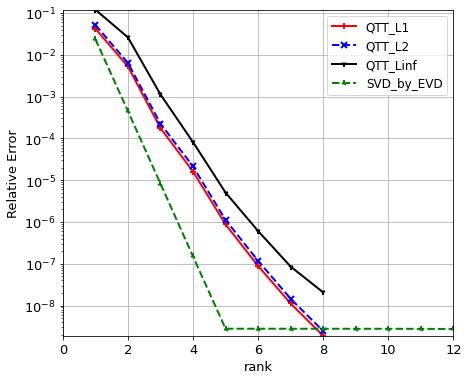

In [58]:
from analysis.benchmark_2D import benchmark_2D
decomp_methods=["QTT_SVD","SVD_by_EVD"]
N=2**11
print(N)
benchmark_2D(decomp_methods ,shape=[N,N//2], test_function=1, plot=True,
                plot_name='',tol=1e-16)

## Next development step
 - test QTT agains other high order decomposition methods
 - Include $L_1$, $L_2$ and $L_\infty$ norms as per requested
 - find and external library to test HT. probably no time, nor point in conding HT